In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('housing.csv')

# Separate features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical columns
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']
categorical_features = ['ocean_proximity']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessor and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")

# Feature importance (for numeric features)
numeric_importance = model.named_steps['regressor'].coef_[:len(numeric_features)]
feature_importance = pd.DataFrame({'feature': numeric_features, 'importance': np.abs(numeric_importance)})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

Mean squared error: 4908290571.35
R2 score: 0.63

Feature Importance:
              feature    importance
7       median_income  75167.774766
1            latitude  54415.696144
0           longitude  53826.648016
5          population  43403.432427
4      total_bedrooms  43068.181842
6          households  18382.196324
2  housing_median_age  13889.866189
3         total_rooms  13094.251162


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean squared error: 4200188130.94
R2 score: 0.68


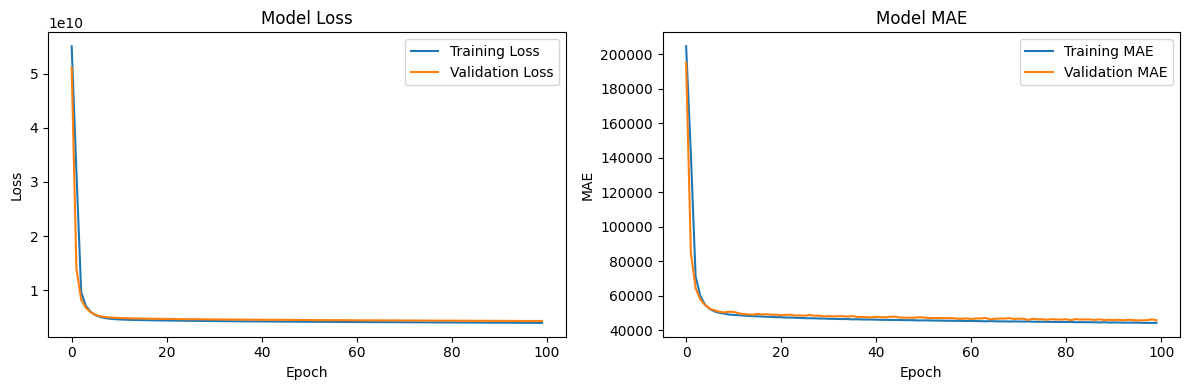

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

# Load the data
data = pd.read_csv('housing.csv')

# Separate features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical columns
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']
categorical_features = ['ocean_proximity']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get the number of features after preprocessing
n_features = X_train_processed.shape[1]

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

# Evaluate the model
y_pred = model.predict(X_test_processed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
 def backward(self, X, y, y_hat, learning_rate):
    # Backpropagation
    delta2 = (y_hat - y) * self.sigmoid_derivative(self.z2)
    delta1 = delta2.dot(self.weights2.T) * self.sigmoid_derivative(self.z1)
    self.weights2 -= learning_rate * self.a1.T.dot(delta2)
    self.weights1 -= learning_rate * X.T.dot(delta1)

def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(self, z):
    return self.sigmoid(z) * (1 - self.sigmoid(z))

In [ ]:
class NeuralNetwork:
    def _init_(self, input_size, hidden_size, output_size):
        # Initialize weights randomly
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)


    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.weights1)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2)
        self.y_hat = self.sigmoid(self.z2)
        return self.y_hat

    def backward(self, X, y, y_hat, learning_rate):
        # Backpropagation
        delta2 = (y_hat - y) * self.sigmoid_derivative(self.z2)
        delta1 = delta2.dot(self.weights2.T) * self.sigmoid_derivative(self.z1)
        self.weights2 -= learning_rate * self.a1.T.dot(delta2)
        self.weights1 -= learning_rate * X.T.dot(delta1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))


In [ ]:
# Separate features (X) and target variable (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (16512, 9)
Testing set shape: (4128, 9)
Training target shape: (16512,)
Testing target shape: (4128,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define numeric and categorical columns
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']
categorical_features = ['ocean_proximity']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ])

# Fit the preprocessor on the training data and transform both training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed training set shape:", X_train_processed.shape)
print("Processed testing set shape:", X_test_processed.shape)

Processed training set shape: (16512, 12)
Processed testing set shape: (4128, 12)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
